#**Computer Sales Dataset**
this set of data is composed of a sample of people who bought computer that correlates to their age, income, stduent, and credit rating.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installing and Importing necessary Packages
like pandas, scikit, numpy as well as seaborn and matplotlib for data visualization.

In [ ]:
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from random import randint

# removing the lines below will introduce gaussian naive beyes input feature warning
# but everything still works fine
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


#**Training the Model**
This part is where we start to train the model in order to have an accurate and proper prediction of the dataset.




##Reading Dataset
We will verify if the proper data set, which is the Buy_Computer.csv, by showing the df

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/3rd Year AI/Buy_Computer (1).csv')
df

,age,income,student,credit_rating,Buy_Computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_age,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_age,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


##Make Categorical Data to Numerical Data
This part is where we used a .map function to make the categorical data to numerical for an easier reading and then proceeded to use train the data. 

In [ ]:
df['age'] = df['age'].map({'youth':0,'middle_age':1,'senior':2})
df['income'] = df['income'].map({'high':0,'medium':1,'low':2})
df['student'] = df['student'].map({'no':0,'yes':1})
df['credit_rating'] = df['credit_rating'].map({'fair':0,'excellent':1})
df['Buy_Computer'] = df['Buy_Computer'].map({'no':0,'yes':1})

x = df.drop('Buy_Computer',axis=1)
y = df['Buy_Computer']

##Splitting the Data
The following parts below shows how the data is split by seperating the data into 4 types: x_train, x_test, y_train, y_test.

The y_test was split into 80 train data and 20 test data which can be seen by the code: 


```
train_test_split(x,y,test_size=0.2)
```



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

,age,income,student,credit_rating
3,2,1,0,0
0,0,0,0,0
9,2,1,1,0
7,0,1,0,0
11,1,1,0,1
13,2,1,0,1
2,1,0,0,0
12,1,0,1,0
10,0,1,1,1
6,1,2,1,1


In [ ]:
x_test

,age,income,student,credit_rating
5,2,2,1,1
1,0,0,0,1
4,2,2,1,0


In [ ]:
y_train

3     1
0     0
9     1
7     0
11    1
13    0
2     1
12    1
10    1
6     1
8     1
Name: Buy_Computer, dtype: int64

In [ ]:
y_test

5    0
1    0
4    1
Name: Buy_Computer, dtype: int64

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
predicted_value = model.predict(x_test)
predicted_value

array([1, 0, 1])

#**Classification Report**
This part is where we can see the different metrics as well as the confusion matrix.

##Recall Computation

In [ ]:
cf = confusion_matrix(y_test, predicted_value)
recall_score = cf[0,0]/(cf[0,0] + cf[1,0])*100
print("Recall:",recall_score)

Recall: 100.0


##Precision Computation

In [ ]:
cf = confusion_matrix(predicted_value,y_test)
precision_score = cf[0,0]/(cf[0,0] + cf[1,1])*100
print("Precision:",precision_score)

Precision: 50.0


##Accuracy Computation

In [ ]:
print(f"Accuracy: {round(accuracy_score(predicted_value,y_test),2)*100}")

Accuracy: 67.0


##Classification Report
This is a built in feature from scikit in which you can just get the metrics of Accuracy, Precision and Recall  with just one call from the function "classification_report".



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_value))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



##Confusion Matrix
This part is where we can check the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(predicted_value,y_test)

array([[1, 0],
       [1, 1]])

#**Model Testing and Prediction**

##Model Testing
This phase let us understand and try our trained model to see if we have achieved an accurate representation in accordance to the data we have trained it on.

In [ ]:
df_sample = pd.DataFrame(columns=['age', 'income', 'student', 'credit_rating'])
age = input('enter the following numbers if you are part of this age group:\n 0 for youth, 1 for middle age, 2 for senior \n enter age:')
income = input('\n enter the following numbers if your income is:\n 0 for low, 1 for medium, 2 for high \n enter income:')
student = input('\n enter the following numbers if you are a student:\n 0 for no, 1 for yes \n enter student:')
credit_rating = input('\n enter the following numbers if you have this credit rating:\n 0 for fair, 1 for excellent \n enter credit rating:')
df_sample.loc[len(df_sample.index)] = [age, income, student, credit_rating]

enter the following numbers if you are part of this age group:
 0 for youth, 1 for middle age, 2 for senior 
 enter age:1

 enter the following numbers if your income is:
 0 for low, 1 for medium, 2 for high 
 enter income:0

 enter the following numbers if you are a student:
 0 for no, 1 for yes 
 enter student:1

 enter the following numbers if you have this credit rating:
 0 for fair, 1 for excellent 
 enter credit rating:1


In [ ]:
df_sample

,age,income,student,credit_rating
0,1,0,1,1


> We checked if the values we have inputted had been reflected through the "df_sample"

##Model Prediction
This phase is where we called the df_sample and predict the proper output that was based on the trained model. 

In [ ]:
model.predict(df_sample)

array([1])

##Example Python Program
This is used to test if the df_sample we have inputted can give the proper answer through a simpel python code in addition to the prediction function earlier.

In [ ]:
prediction=model.predict(df_sample)
if prediction == 0:
  print("You have not bought a computer.")
else:
  print("You have bought a computer")

You have bought a computer


#Computation and result of Type 1 and 2 errors

In [ ]:
#case 1
df_sample = pd.DataFrame(columns=['age', 'income', 'student', 'credit_rating'])
age = 0 #input('enter the following numbers if you are part of this age group:\n 0 for youth, 1 for middle age, 2 for senior \n enter age:')
income = 0 #input('\n enter the following numbers if your income is:\n 0 for low, 1 for medium, 2 for high \n enter income:')
student = 1 #input('\n enter the following numbers if you are a student:\n 0 for no, 1 for yes \n enter student:')
credit_rating = 0 #input('\n enter the following numbers if you have this credit rating:\n 0 for fair, 1 for excellent \n enter credit rating:')
df_sample.loc[len(df_sample.index)] = [age, income, student, credit_rating]

prediction=model.predict(df_sample)
if prediction == 0:
  print("\n You have not bought a computer. \n Tip: Start saving money to afford a Computer")
else:
  print("\n You have bought a computer \n Tip: The average warranty for Computer Devices is only available for 3 years.")


 You have bought a computer 
 Tip: The average warranty for Computer Devices is only available for 3 years.


##Case 1
> This is a case of True Positive

Because the final output for being a young student with low income and fair credit score will have a computer in accordance to the given table.

In [ ]:
#case 2
df_sample = pd.DataFrame(columns=['age', 'income', 'student', 'credit_rating'])
age = 0 #input('enter the following numbers if you are part of this age group:\n 0 for youth, 1 for middle age, 2 for senior \n enter age:')
income = 2 #input('\n enter the following numbers if your income is:\n 0 for low, 1 for medium, 2 for high \n enter income:')
student = 0 #input('\n enter the following numbers if you are a student:\n 0 for no, 1 for yes \n enter student:')
credit_rating = 0 #input('\n enter the following numbers if you have this credit rating:\n 0 for fair, 1 for excellent \n enter credit rating:')
df_sample.loc[len(df_sample.index)] = [age, income, student, credit_rating]

prediction=model.predict(df_sample)
if prediction == 0:
  print("\n You have not bought a computer. \n Tip: Start saving money to afford a Computer")
else:
  print("\n You have bought a computer \n Tip: The average warranty for Computer Devices is only available for 3 years.")

NameError: ignored

##Case 2
> This is a case of True Negative

Because the final output for being a young non-student with high income and fair credit score will have no computer in accordance to the given table.

In [ ]:
#case 3
df_sample = pd.DataFrame(columns=['age', 'income', 'student', 'credit_rating'])
age = 2 #input('enter the following numbers if you are part of this age group:\n 0 for youth, 1 for middle age, 2 for senior \n enter age:')
income = 0 #input('\n enter the following numbers if your income is:\n 0 for low, 1 for medium, 2 for high \n enter income:')
student = 1 #input('\n enter the following numbers if you are a student:\n 0 for no, 1 for yes \n enter student:')
credit_rating = 1 #input('\n enter the following numbers if you have this credit rating:\n 0 for fair, 1 for excellent \n enter credit rating:')
df_sample.loc[len(df_sample.index)] = [age, income, student, credit_rating]

prediction=model.predict(df_sample)
if prediction == 0:
  print("\n You have not bought a computer. \n Tip: Start saving money to afford a Computer")
else:
  print("\n You have bought a computer \n Tip: The average warranty for Computer Devices is only available for 3 years.")


 You have bought a computer 
 Tip: The average warranty for Computer Devices is only available for 3 years.


##Case 3
> This is a case of False Positive

Because the final output for being a senior student with low income and excelent credit score will have no computer in accordance to the given table.

In [ ]:
#case 4
df_sample = pd.DataFrame(columns=['age', 'income', 'student', 'credit_rating'])
age = 2 #input('enter the following numbers if you are part of this age group:\n 0 for youth, 1 for middle age, 2 for senior \n enter age:')
income = 2 #input('\n enter the following numbers if your income is:\n 0 for low, 1 for medium, 2 for high \n enter income:')
student = 1 #input('\n enter the following numbers if you are a student:\n 0 for no, 1 for yes \n enter student:')
credit_rating = 1 #input('\n enter the following numbers if you have this credit rating:\n 0 for fair, 1 for excellent \n enter credit rating:')
df_sample.loc[len(df_sample.index)] = [age, income, student, credit_rating]

prediction=model.predict(df_sample)
if prediction == 0:
  print("\n You have not bought a computer. \n Tip: Start saving money to afford a Computer")
else:
  print("\n You have bought a computer \n Tip: The average warranty for Computer Devices is only available for 3 years.")


 You have bought a computer 
 Tip: The average warranty for Computer Devices is only available for 3 years.


##Case 4
> This is a case of True Positive

Because the possible output for being a senior student with high income and excellent credit score will have a computer which is correct given the limited data to be trained on.

In [ ]:
#case 5
df_sample = pd.DataFrame(columns=['age', 'income', 'student', 'credit_rating'])
age = 0 #input('enter the following numbers if you are part of this age group:\n 0 for youth, 1 for middle age, 2 for senior \n enter age:')
income = 0 #input('\n enter the following numbers if your income is:\n 0 for low, 1 for medium, 2 for high \n enter income:')
student = 0 #input('\n enter the following numbers if you are a student:\n 0 for no, 1 for yes \n enter student:')
credit_rating = 0 #input('\n enter the following numbers if you have this credit rating:\n 0 for fair, 1 for excellent \n enter credit rating:')
df_sample.loc[len(df_sample.index)] = [age, income, student, credit_rating]

prediction=model.predict(df_sample)
if prediction == 0:
  print("\n You have not bought a computer. \n Tip: Start saving money to afford a Computer")
else:
  print("\n You have bought a computer \n Tip: The average warranty for Computer Devices is only available for 3 years.")


 You have not bought a computer. 
 Tip: Start saving money to afford a Computer


##Case 5
> This is a case of True Negative

Because the possible output for being a young non-student with low income and fair credit score will have no computer.

#**Visualization of the Dataset**

This 2nd part is where I visualized the data by utilizing the seaborn and matplotlib imports

In [ ]:
df_vs = pd.read_csv('/content/drive/MyDrive/3rd Year AI/Buy_Computer (1).csv')
df_vs 

,age,income,student,credit_rating,Buy_Computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_age,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_age,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


> Redefined the dataframe in order for it to be categorical and easier to understand.

<Axes: xlabel='age', ylabel='count'>

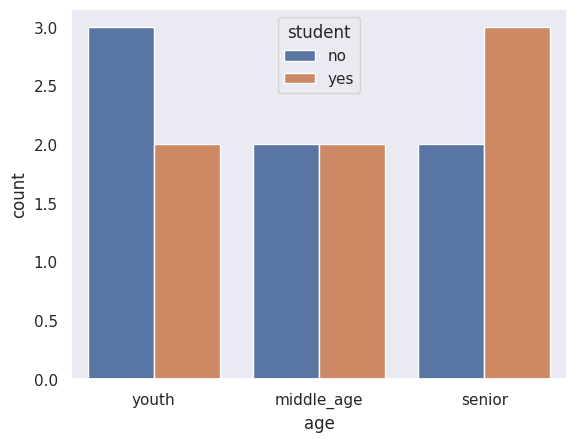

In [ ]:
sns.countplot(x="age", hue = "student", data=df_vs)

##**1st Insights**
> The bar graph above provides insights on how age group impacts student status. It can be observed from the data that younger individuals are more likely to be non-students compared to seniors, who are more likely to be students.

<Axes: xlabel='student', ylabel='count'>

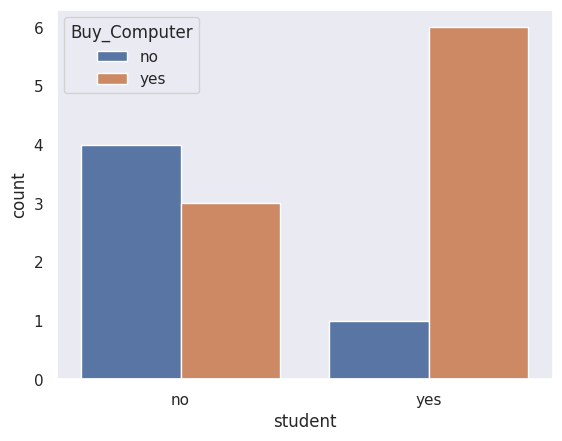

In [ ]:
sns.countplot(x="student", hue = "Buy_Computer", data=df_vs)

##**2nd Insights**
> The bar graph above provides insights on how being a student affects if they bought a computer or not. It can be observed from the data that being a student will most likely bought a computer unit than being a non-student.

<Axes: xlabel='income', ylabel='count'>

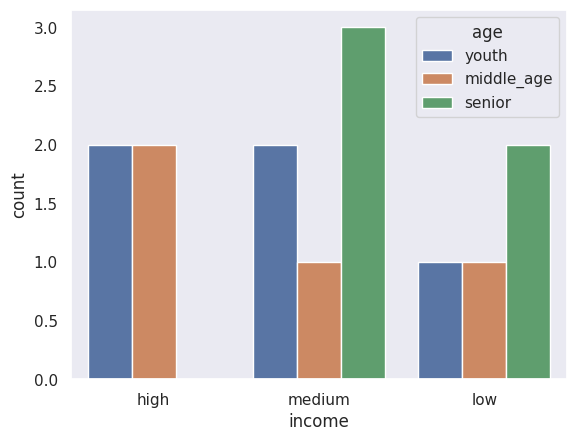

In [ ]:
sns.countplot(data=df_vs, x = 'income', hue = 'age')

##**3nd Insights**
> The bar graph displayed above reveals how age groups are correlated to the income levels they possess. Based on the data, we can observe that the majority of the senior age group has a moderate level of income, while the younger and middle-aged groups are more likely to have a high level of income.